# --- Day 12: Passage Pathing ---
Advent of Code 2021

## Part 1

In [1]:
import networkx as nx

In [25]:
data = '''
start-A
start-b
A-c
A-b
b-d
A-end
b-end
'''
data = data.split() 
data = [item.replace("start", "START").replace("end", "END") for item in data]
data = [tuple(item.split("-")) for item in data]
data = [item for item in data if not "".join(item).islower()]

In [26]:
data

[('START', 'A'),
 ('START', 'b'),
 ('A', 'c'),
 ('A', 'b'),
 ('A', 'END'),
 ('b', 'END')]

In [27]:
reversed_edges = []

for edge in data:
    # if "START" not in edge and "END" not in edge:
        reversed_edges.append(tuple(reversed(edge)))
        
data.extend(reversed_edges)
data = list(set(data))

In [28]:
data

[('A', 'END'),
 ('A', 'START'),
 ('c', 'A'),
 ('b', 'A'),
 ('END', 'A'),
 ('END', 'b'),
 ('A', 'c'),
 ('b', 'END'),
 ('START', 'A'),
 ('b', 'START'),
 ('A', 'b'),
 ('START', 'b')]

In [29]:
G = nx.DiGraph()

for edge in data:
    G.add_edge(edge[0], edge[1])

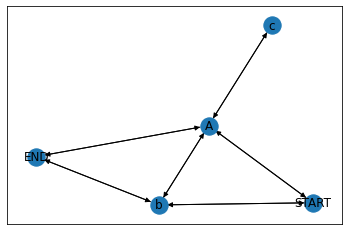

In [30]:
nx.draw_networkx(G)

In [42]:
list(nx.all_simple_paths(G,"START", "END"))

[['START', 'A', 'END'],
 ['START', 'A', 'b', 'END'],
 ['START', 'b', 'A', 'END'],
 ['START', 'b', 'END']]

In [1]:
from itertools import permutations
from collections import Counter

In [2]:
with open("input/day12.txt") as f:
    data = f.read()

In [3]:
data = data.split() 
data = [item.replace("start", "START").replace("end", "END") for item in data]
data = [tuple(item.split("-")) for item in data]
data = [item for item in data if not "".join(item).islower()]

In [4]:
reversed_edges = []

for edge in data:
    if "START" not in edge and "END" not in edge:
        reversed_edges.append(tuple(reversed(edge)))
        
data.extend(reversed_edges)
data = set(data)

In [16]:
start_edges = [item for item in data if item[0]=='START' or item[1]=='START']
end_edges = [item for item in data if item[1]=='END' or item[0]=='END'] 
mid_edges = [item for item in data if item not in start_edges and item not in end_edges]
mid_edges = [item for item in mid_edges if not "".join(item).islower()]

In [19]:
mid_edges

[('iy', 'FP'),
 ('xx', 'KG'),
 ('iy', 'AB'),
 ('AB', 'xx'),
 ('yi', 'KG'),
 ('qe', 'FP'),
 ('yi', 'LS'),
 ('EG', 'xx'),
 ('iy', 'KG'),
 ('KG', 'iy'),
 ('xx', 'EG'),
 ('AB', 'qc'),
 ('qc', 'LS'),
 ('FP', 'qe'),
 ('iy', 'LS'),
 ('KG', 'yi'),
 ('LS', 'iy'),
 ('FP', 'xx'),
 ('yi', 'FP'),
 ('FP', 'iy'),
 ('KG', 'xx'),
 ('qc', 'KG'),
 ('FP', 'yi'),
 ('xx', 'FP'),
 ('xx', 'AB'),
 ('LS', 'yi'),
 ('qc', 'AB'),
 ('KG', 'qc'),
 ('AB', 'iy'),
 ('LS', 'qc')]

In [ ]:
all_paths = []
for i in range(len(mid_edges)+1):
    all_paths.extend(list(permutations(mid_edges, i)))

In [ ]:
all_paths = [path for path in all_paths[1:] if path[0][0] in [item[1] for item in start_edges]]
all_paths = [path for path in all_paths if path[-1][-1] in [item[0] for item in end_edges]]

In [ ]:
def valid_str(path):
    temp_str = ''.join([letter for letter in path if letter.islower()])
    if len(temp_str)<2:
        return True
    
    if Counter(temp_str).most_common(1)[0][-1]==1:
        return True
    
    return False

In [ ]:
def valid_path(path):
    if len(path)==1:
        result = f"{path[0][0]},{path[0][1]}"
        if valid_str(result):
            return result
        return False
    
    path_string = "".join(["".join(tup) for tup in path])
    iter_path = iter(path_string[1:-1])
    
    for x in iter_path:
        if x!= next(iter_path):
            return False
    
    temp_str = ",".join([tup[0] for tup in path[:-1]])
    result = f"{temp_str},{path[-1][0]},{path[-1][1]}"
    if valid_str(result):
        return result
    return False

In [ ]:
all_paths = [valid_path(path) for path in all_paths]

In [ ]:
direct_paths = [item[1] for item in start_edges if item[1] in [item[0] for item in end_edges]]
all_paths.extend(direct_paths)

In [ ]:
result = sorted([f"start,{path},end" for path in all_paths])

In [ ]:
len(result)

## Part 2